# **The Problem**
Build a predictive model and predict the sales of each product at a particular outlet.

**Important:** Sales of a given product at a retail store can depend both on store attributes as well as product attributes.

# **About Dataset**
**Sales Prediction for Big Mart Outlets**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**Data Dictionary**

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

# **Import Dependencies**



In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

sns.set()

Getting The Data

In [54]:
# load the data
raw_data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [55]:
raw_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [56]:
# number of datapoints and features
raw_data.shape

(14204, 12)

In [57]:
# check general info and dtypes
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [58]:
# get statistics from the data
raw_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11815.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,14204,14204,14204,14204.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDT36,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,7122,5583,9294,NaN
mean,NaN,12.788355,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2185.836320
std,NaN,4.654126,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1827.479550
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,922.135101
50%,NaN,12.500000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1768.287680
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,2988.110400


In [59]:
# verify null values
raw_data.isna().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
# check for duplicated rows
raw_data.duplicated().any()

False

In [61]:
# verify unique values
raw_data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    417
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

In [62]:
# getting categorical and numerical columns
cat_cols = raw_data.select_dtypes(exclude='number').columns.to_list()
num_cols = raw_data.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [63]:
# exploring categories
for col in cat_cols:
    print('-----------------------------')
    print('Series: ', col)
    print('-----------------------------')
    print(raw_data[col].value_counts())
    print('\n')

-----------------------------
Series:  Item_Identifier
-----------------------------
FDT36    10
FDG09    10
FDZ56    10
FDT19    10
FDD56    10
         ..
NCW54     7
FDS22     7
FDM50     7
FDX49     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64


-----------------------------
Series:  Item_Fat_Content
-----------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


-----------------------------
Series:  Item_Type
-----------------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 1

# **Notes:**
The dataset 8523 contains datapoints (rows) and 12 features (columns).
The dataset is for 1559 items in 10 different stores.
There are present categorical (object) and numerical features (float, int).
The target is the _'Item_OutletSales' feature.
Some features presents null values and outliers.
There are no duplicate rows.

**_ItemIdentifier:**

Ids for 1559 different items.
The ids has some prefixes: FD=Food, DR=Drink, NC=Non-Consumable.

**_ItemWeight:**

It contains null values.

**_Item_FatContent:**

It has 5 different categories, but some of them do reference to an existing category, it can be summarized to two categories: Low Fat and Regular.
This feature do not apply to Non-Consumable items, a new category for them can be created.

**_ItemVisibility:**

Some values are 0%, an item can not be bought by a consumer if its not visible, this is an outlier.

**_ItemType:**

There are 16 different item types, the data is not well distributed among all of them.
The model can be biased towards the most repetitive types: Fruits and Vegetables and Snack Foods.

**_OutletIdentifier:**

There are 10 different outlet ids.
The data seems to be pretty well distributed among all the outlets.

**_OutletSize:**

It has null values.
The data is not well distributed among the different sizes.
The _OuletSize has some relation with the _OuletType that need to be considered when the null values be filled.

**_Outlet_Location_Type and OutletType:**

The data is not well distributed among the different sizes.
The model can be biased towards the most repetitive types.

# Cleaning The Data And Create New Features

In [64]:
# make a copy of the data
clean_data = raw_data.copy()

In [65]:
# format column names to be lower-case
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names

print(clean_data.columns)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


# Filling _'itemweight' null values

In [66]:
# fill null values using the mean
clean_data['item_weight'].fillna(clean_data['item_weight'].mean(), inplace=True)
clean_data.isna().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [67]:
# print total number of 0s
print('Total of 0s before replace: ', sum(clean_data['item_visibility'] == 0))

# replace 0s with the mean
clean_data.loc[:,'item_visibility'].replace(to_replace=0, value=clean_data['item_visibility'].mean(), inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(clean_data['item_visibility'] == 0))

Total of 0s before replace:  879
Total of 0s after replace:  0


### **Replace 'item_fat_content' values**

In [68]:
# print values
print(clean_data['item_fat_content'].unique())

['Low Fat' 'LF' 'Regular' 'reg' 'low fat']


In [69]:
# replace the repetitive values
clean_data['item_fat_content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
clean_data['item_fat_content'].value_counts()

Low Fat    9185
Regular    5019
Name: item_fat_content, dtype: int64

### **Create a new 'item_category' feature**

In [70]:
# create a new feature using the two first letters of the item_identifier
clean_data['item_category'] = clean_data['item_identifier'].apply(lambda x: x[:2])
clean_data['item_category'] = clean_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
clean_data['item_category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: item_category, dtype: int64

### **Update _'item_fatcontent' for Non-Consumables**

In [71]:
# adding a new item item_fat_content category for non-consumable items
clean_data.loc[clean_data['item_category'] == 'Non-Consumable', 'item_fat_content'] = 'No Edible'
clean_data['item_fat_content'].value_counts()

Low Fat      6499
Regular      5019
No Edible    2686
Name: item_fat_content, dtype: int64

### **Create a new _'outletyears' feature**

In [72]:
# the new feature tell us how old is the outlet
clean_data['outlet_years'] = 2013 - clean_data['outlet_establishment_year']
clean_data['outlet_years']

0        14
1         6
2         4
3        28
4         6
         ..
14199     9
14200     6
14201    26
14202    28
14203    14
Name: outlet_years, Length: 14204, dtype: int64

### **Analyze And Visualize The Data**

In [73]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721,Food,14
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721,Food,6
2,FDT36,12.3,Low Fat,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400,Food,4
3,FDT36,12.3,Low Fat,0.065953,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000,Food,28
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000,Food,6


### **Plot categorical features**

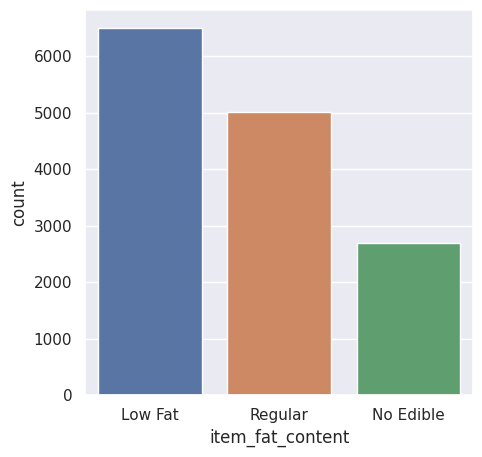

In [74]:
# plot item_fat_content
plt.figure(figsize=(5,5))
sns.countplot(x='item_fat_content', data=clean_data)
plt.show()

[Text(0, 0, 'Baking Goods'),
 Text(1, 0, 'Breads'),
 Text(2, 0, 'Breakfast'),
 Text(3, 0, 'Canned'),
 Text(4, 0, 'Dairy'),
 Text(5, 0, 'Frozen Foods'),
 Text(6, 0, 'Fruits and Vegetables'),
 Text(7, 0, 'Hard Drinks'),
 Text(8, 0, 'Health and Hygiene'),
 Text(9, 0, 'Household'),
 Text(10, 0, 'Meat'),
 Text(11, 0, 'Others'),
 Text(12, 0, 'Seafood'),
 Text(13, 0, 'Snack Foods'),
 Text(14, 0, 'Soft Drinks'),
 Text(15, 0, 'Starchy Foods')]

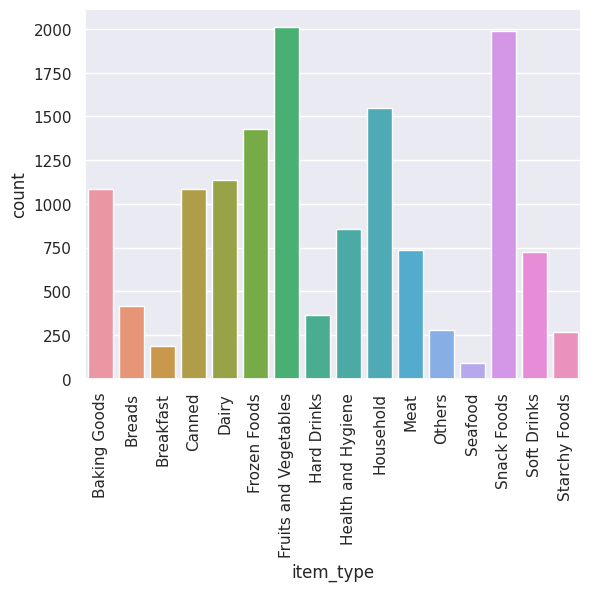

In [75]:
# plot item_type
labels = list(clean_data['item_type'].unique())
chart = sns.countplot(x=clean_data['item_type'])
chart.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT017'),
 Text(2, 0, 'OUT018'),
 Text(3, 0, 'OUT019'),
 Text(4, 0, 'OUT046'),
 Text(5, 0, 'OUT013'),
 Text(6, 0, 'OUT027'),
 Text(7, 0, 'OUT045'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT010')]

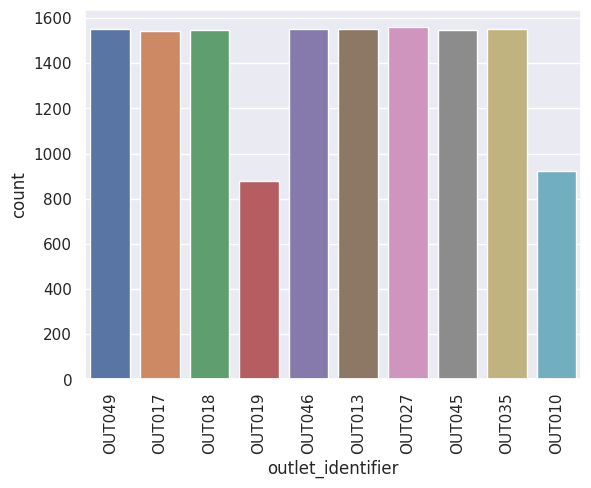

In [76]:
# plot outlet_identifier
labels = list(clean_data['outlet_identifier'].unique())
chart = sns.countplot(x=clean_data['outlet_identifier'])
chart.set_xticklabels(labels=labels, rotation=90)

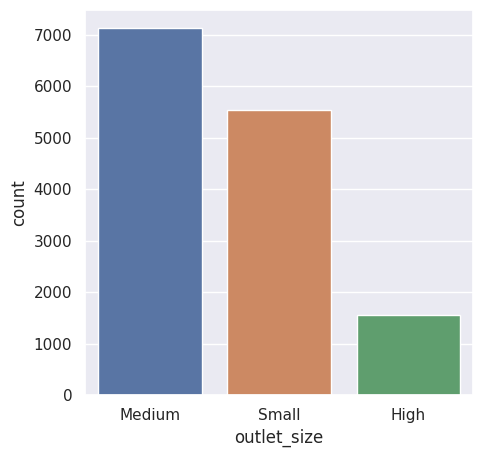

In [77]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_size', data=clean_data)
plt.show()

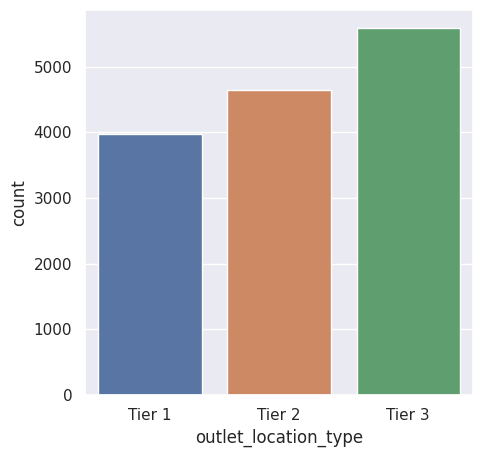

In [78]:
# plot outlet_location_type
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_location_type', data=clean_data)
plt.show()

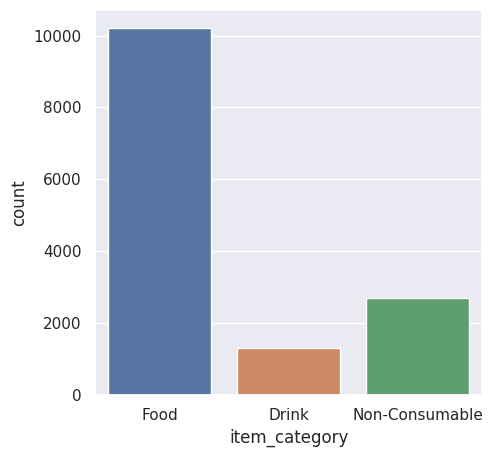

In [79]:
# plot item_category
plt.figure(figsize=(5,5))
sns.countplot(x='item_category', data=clean_data)
plt.show()

### **Plot data data distribution**

array([[<Axes: title={'center': 'item_weight'}>,
        <Axes: title={'center': 'item_visibility'}>],
       [<Axes: title={'center': 'item_mrp'}>,
        <Axes: title={'center': 'outlet_establishment_year'}>],
       [<Axes: title={'center': 'item_outlet_sales'}>,
        <Axes: title={'center': 'outlet_years'}>]], dtype=object)

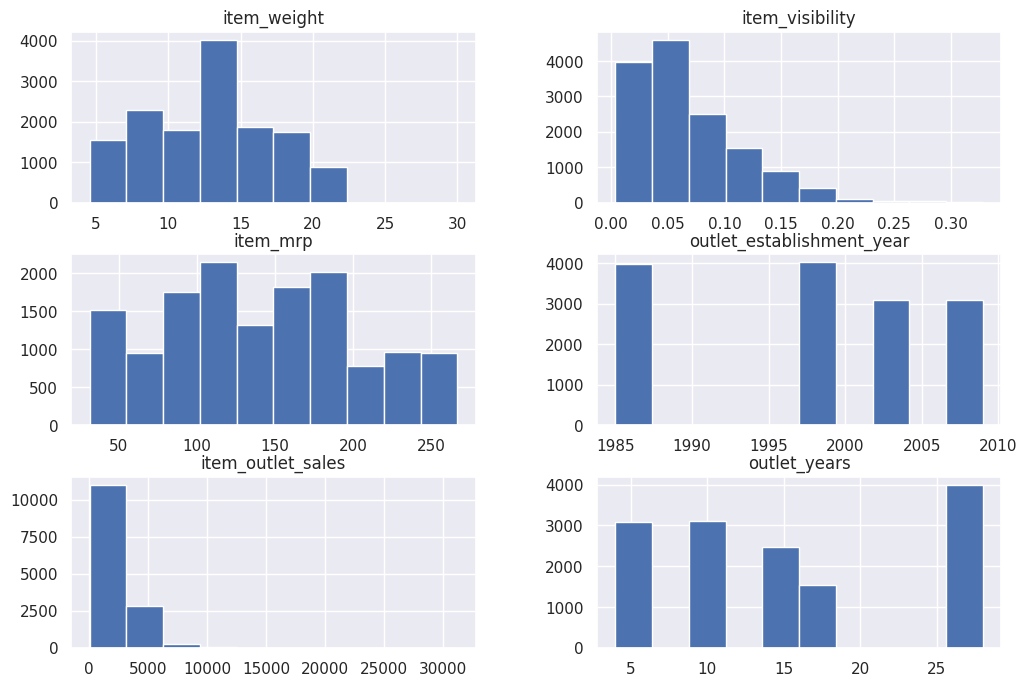

In [80]:
# data distribution of numerical values
clean_data.hist(figsize=(12,8))

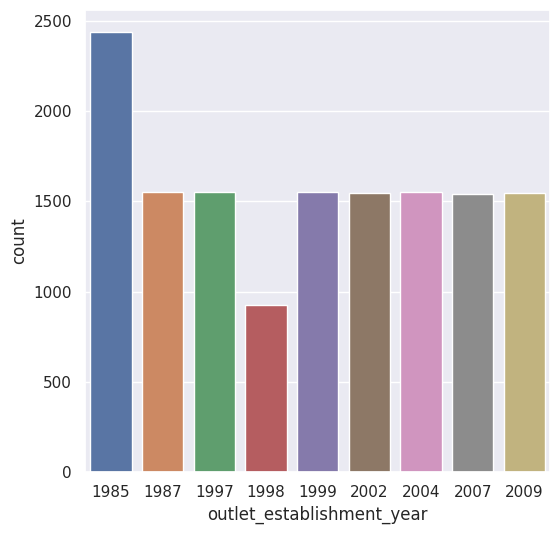

In [81]:
# outlet_establishment_year column count
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_establishment_year', data=clean_data)
plt.show()

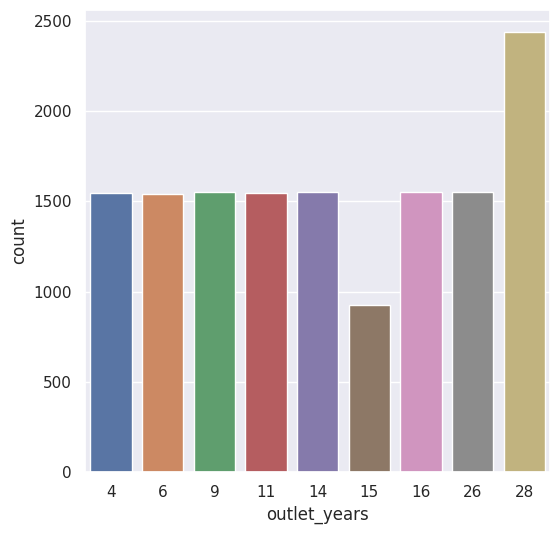

In [82]:
# outlet_years column count
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_years', data=clean_data)
plt.show()

In [83]:
# correlation with the target column
corr_matrix = clean_data.corr()
corr_matrix['item_outlet_sales'].sort_values(ascending=False)

<ipython-input-83-c047f1d47daa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_data.corr()


item_outlet_sales            1.000000
item_mrp                     0.532261
item_weight                  0.159809
outlet_years                 0.110786
outlet_establishment_year   -0.110786
item_visibility             -0.155592
Name: item_outlet_sales, dtype: float64

<Axes: >

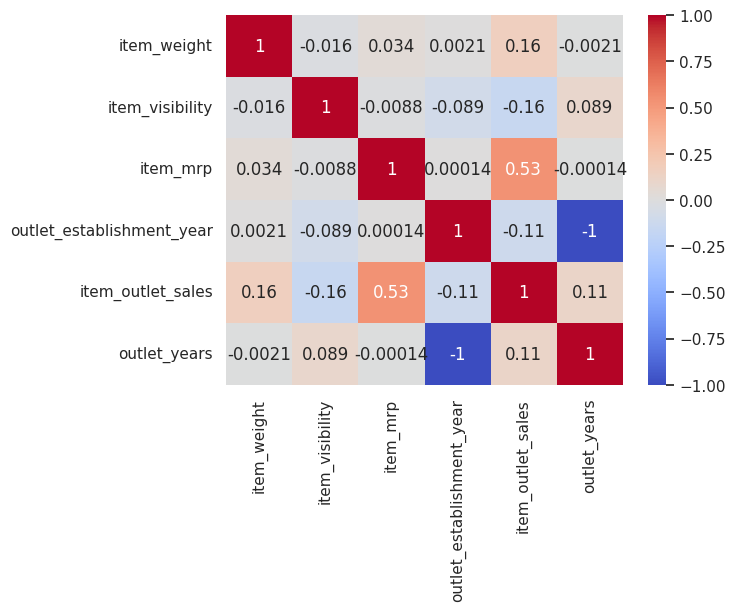

In [84]:
# plot correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='item_mrp', ylabel='item_outlet_sales'>

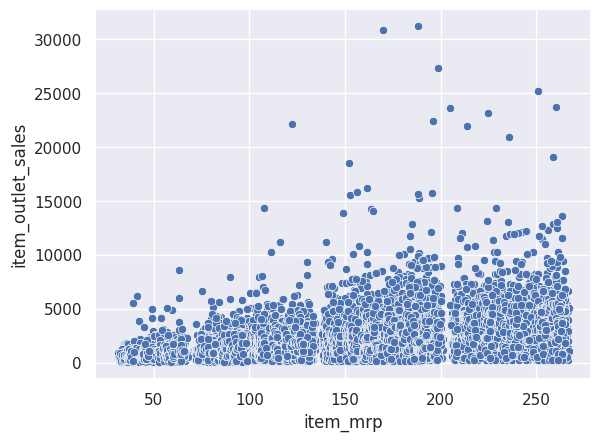

In [85]:
# scatter plot of item_mrp and item_outlet_sales
sns.scatterplot(data=clean_data, x='item_mrp', y='item_outlet_sales')

**Notes:**

- The data present some minor changes based on what was done in the previous step.
- Some of the categorical features are not well distributed, the model can present some bias toward the most repetitive ones.
- There is not a clear correlation with the numerical features, 'Item_MRP' seems to be the most essential feature to estimate the 'Item_Outlet_Sales'.

### **Data Pre-processing.**

In [86]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721,Food,14
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721,Food,6
2,FDT36,12.3,Low Fat,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400,Food,4
3,FDT36,12.3,Low Fat,0.065953,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000,Food,28
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000,Food,6


In [87]:
# applying label encoding to some features
encoder = LabelEncoder()

cols_to_encode = ['item_identifier', 'item_type', 'outlet_identifier']

for col in cols_to_encode:
    clean_data[col] = encoder.fit_transform(clean_data[col])

In [88]:
# applying one-hot encoding to some features
clean_data = pd.get_dummies(clean_data, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type', 'item_category'])

In [89]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,item_outlet_sales,outlet_years,item_fat_content_Low Fat,...,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_category_Drink,item_category_Food,item_category_Non-Consumable
0,946,12.3,0.111448,0,33.4874,9,1999,436.608721,14,1,...,1,0,0,0,1,0,0,0,1,0
1,946,12.3,0.111904,0,33.9874,2,2007,443.127721,6,1,...,0,1,0,0,1,0,0,0,1,0
2,946,12.3,0.111728,0,33.9874,3,2009,564.598400,4,1,...,0,0,1,0,0,1,0,0,1,0
3,946,12.3,0.065953,0,34.3874,4,1985,1719.370000,28,1,...,1,0,0,1,0,0,0,0,1,0
4,740,9.8,0.045523,0,35.0874,2,2007,352.874000,6,0,...,0,1,0,0,1,0,0,0,1,0


### **Defining The Input Data**

In [90]:
# setting model input and target variables
X = clean_data.drop(columns=['outlet_establishment_year', 'item_outlet_sales'])
y = clean_data['item_outlet_sales']

### **Exploring Different Models**

In [91]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [92]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [93]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)

    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)

    # predict the validation set
    y_hat = pipeline.predict(X_validate)

    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)

    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]

    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

### **Linear Regression**

In [94]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1369.8542074325478
R2 Score:  0.4699048277204848


### **Ridge Regularization**

In [95]:
# ridge
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  1369.8267515303066
R2 Score:  0.46992607683633203


### **Lasso Regularization**

In [96]:
# lasso
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1369.9266523961974
R2 Score:  0.4698487578982433


### **SVM**

In [97]:
# svm
svr_model = SVR()
train_and_evaluate_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  1853.0812673760288
R2 Score:  0.02995007878746847


### **Decision Tree**

In [98]:
# decision tree
dtr_model = DecisionTreeRegressor()
train_and_evaluate_model('Decision Tree', dtr_model, X, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1811.3032352499367
R2 Score:  0.07319689795574036


### **Random Forest**

In [99]:
# random forest
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1341.8903397017564
R2 Score:  0.49132639133123746


### **XGBoost**

In [100]:
# xgboost
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1354.558387922722
R2 Score:  0.4816768420690689


### **Model Score Summary**

In [101]:
# display model scores
model_scores

,model,rmse,r2_score
0,Linear Regression,1369.854207,0.469905
1,Ridge,1369.826752,0.469926
2,Lasso,1369.926652,0.469849
3,SVM,1853.081267,0.029950
4,Decision Tree,1811.303235,0.073197
5,Random Forest,1341.890340,0.491326
6,XGBoost,1354.558388,0.481677


**Notes:**

Based on the model score table, the model that best fits this problem that presents the lowest RMSE and highest Score is Linear Regression.